In [1]:
import pandas as pd
import numpy as np
import random
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [2]:
# read data
data = pd.read_excel('data.xlsx', sheet_name='data',  header = 0)
#data.columns

In [3]:
y = data["Prognosis"]
X = data.drop(["Prognosis"], axis = 1)

In [4]:
print(data['Prognosis'].value_counts())

0    100
1    100
Name: Prognosis, dtype: int64


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 0.675
Confusion Matrix:
[[10  6]
 [ 7 17]]
True Positive Rate (TPR): 0.7083
False Positive Rate (FPR): 0.3750
AUC (Area Under the ROC Curve): 0.6667
Recall (Sensitivity): 0.7083
F1-Score: 0.7234


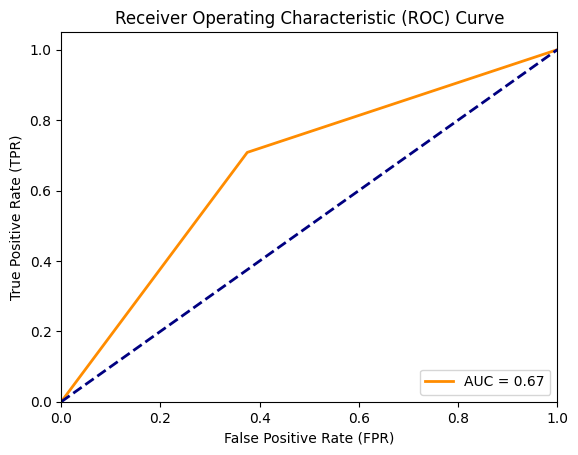

In [7]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, auc, recall_score, f1_score
import matplotlib.pyplot as plt

# Initialize and fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")


# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)
# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")


# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.7500
Confusion Matrix:
[[12  4]
 [ 6 18]]
True Positive Rate (TPR): 0.6667
False Positive Rate (FPR): 0.1818
AUC (Area Under the ROC Curve): 0.7500
Recall (Sensitivity): 0.7500
F1-Score: 0.7826


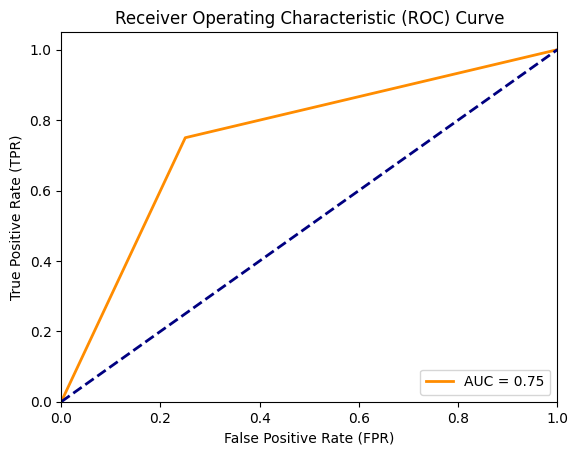

In [8]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Fit the Random Forest model
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TP, FP, FN, TN = cm.ravel()
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7500
Confusion Matrix:
[[12  4]
 [ 6 18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.82      0.75      0.78        24

    accuracy                           0.75        40
   macro avg       0.74      0.75      0.74        40
weighted avg       0.76      0.75      0.75        40

AUC (Area Under the ROC Curve): 0.8581


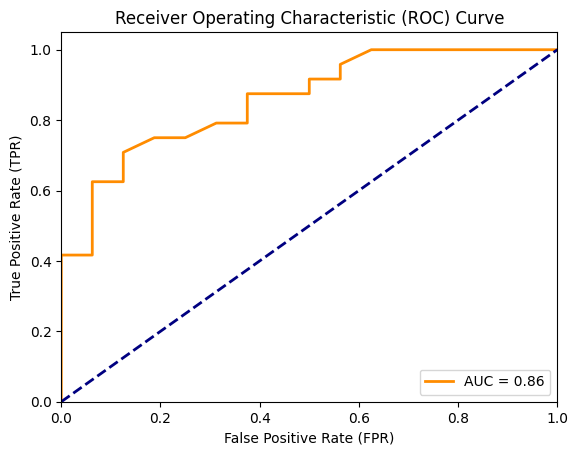

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Create and fit the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
random_forest.fit(X_train, y_train)

# Predict on the test set
y_pred = random_forest.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate AUC (Area Under the ROC Curve)
y_pred_proba = random_forest.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Best Model

Accuracy: 0.7500
Confusion Matrix:
[[11  5]
 [ 5 19]]
True Positive Rate (TPR): 0.7917
False Positive Rate (FPR): 0.3125
AUC (Area Under the ROC Curve): 0.7396
Recall (Sensitivity): 0.7917
F1-Score: 0.7917


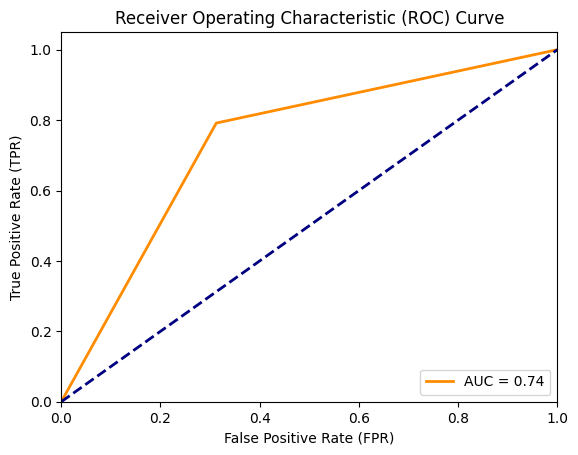

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Create and fit the RandomForestClassifier model
random_forest = RandomForestClassifier()

# Get feature importances
random_forest.fit(X_train, y_train)
feature_importances = random_forest.feature_importances_

# Sort features by importance (descending order) and select the top 10
top_feature_indices = feature_importances.argsort()[::-1][:5]

# Select only the top 10 features from your dataset
X_train_top = X_train[:, top_feature_indices]
X_test_top = X_test[:, top_feature_indices]

# Train the model with the top 10 features
random_forest.fit(X_train_top, y_train)
y_pred = random_forest.predict(X_test_top)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Ever Best Stacking

Cross-Validation Scores (Base Model): [0.75   0.75   0.875  0.6875 0.8125]
Mean Accuracy (Base Model): 0.7750
Base Model Accuracy: 0.9000
Cross-Validation Scores (Stacked Model): [0.75   0.75   0.875  0.6875 0.8125]
Mean Accuracy (Stacked Model): 0.7750
Stacked Model Accuracy: 0.9000
Stacked Model Confusion Matrix:
[[14  2]
 [ 2 22]]
Stacked Model True Positive Rate (TPR): 0.9167
Stacked Model False Positive Rate (FPR): 0.1250
Stacked Model AUC (Area Under the ROC Curve): 0.8958
Stacked Model Recall (Sensitivity): 0.9167
Stacked Model F1-Score: 0.9167


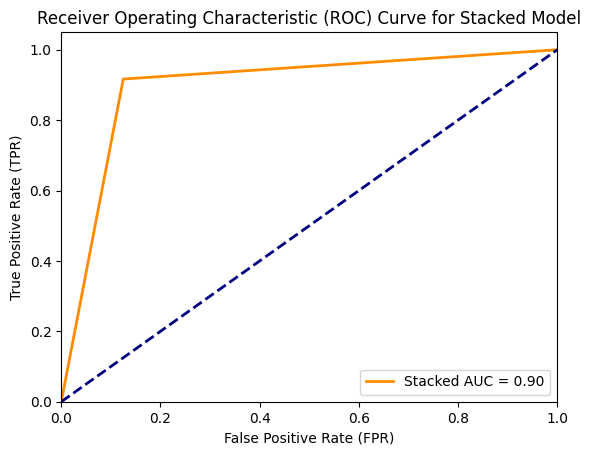

In [11]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create and fit the base RandomForestClassifier model
base_random_forest = RandomForestClassifier(random_state=42)

# Use SelectKBest with ANOVA F-statistic to select the top 5 features
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_top = k_best.fit_transform(X_train, y_train)
X_test_top = k_best.transform(X_test)

# Perform cross-validation on the base model
cv_scores = cross_val_score(base_random_forest, X_train_top, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Base Model): {cv_scores}")
print(f"Mean Accuracy (Base Model): {cv_scores.mean():.4f}")

# Train the base model with the top 5 features
base_random_forest.fit(X_train_top, y_train)
y_pred_base = base_random_forest.predict(X_test_top)

# Evaluate the base model
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Base Model Accuracy: {accuracy_base:.4f}")

# Create a Logistic Regression meta-model
meta_model = LogisticRegression(random_state=42)

# Create a StackingClassifier with the base model and meta-model
stacked_model = StackingClassifier(estimators=[
    ('Random Forest', base_random_forest)
], final_estimator=meta_model, cv=5)

# Perform cross-validation on the stacked model
cv_scores_stacked = cross_val_score(stacked_model, X_train_top, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Stacked Model): {cv_scores_stacked}")
print(f"Mean Accuracy (Stacked Model): {cv_scores_stacked.mean():.4f}")

# Train the stacked model with the top 5 features
stacked_model.fit(X_train_top, y_train)
y_pred_stacked = stacked_model.predict(X_test_top)

# Evaluate the stacked model
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Stacked Model Accuracy: {accuracy_stacked:.4f}")

# Calculate confusion matrix for stacked model
cm_stacked = confusion_matrix(y_test, y_pred_stacked)

# Display the confusion matrix
print("Stacked Model Confusion Matrix:")
print(cm_stacked)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN_stacked, FP_stacked, FN_stacked, TP_stacked = cm_stacked.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for stacked model
TPR_stacked = TP_stacked / (TP_stacked + FN_stacked)
FPR_stacked = FP_stacked / (FP_stacked + TN_stacked)

print(f"Stacked Model True Positive Rate (TPR): {TPR_stacked:.4f}")
print(f"Stacked Model False Positive Rate (FPR): {FPR_stacked:.4f}")

# Calculate AUC for stacked model
roc_auc_stacked = roc_auc_score(y_test, y_pred_stacked)
print(f"Stacked Model AUC (Area Under the ROC Curve): {roc_auc_stacked:.4f}")

# Calculate Recall (Sensitivity) for stacked model
recall_stacked = recall_score(y_test, y_pred_stacked)
print(f"Stacked Model Recall (Sensitivity): {recall_stacked:.4f}")

# Calculate F1-Score for stacked model
f1_stacked = f1_score(y_test, y_pred_stacked)
print(f"Stacked Model F1-Score: {f1_stacked:.4f}")

# Plot ROC Curve for stacked model
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, y_pred_stacked)
plt.figure()
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label=f'Stacked AUC = {roc_auc_stacked:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Stacked Model')
plt.legend(loc="lower right")
plt.show()


Base Random Forest Model Accuracy: 0.8750
Base Gradient Boosting Model Accuracy: 0.9250
Stacked Model Accuracy: 0.9000
Stacked Model Confusion Matrix:
[[13  3]
 [ 1 23]]
Stacked Model True Positive Rate (TPR): 0.9583
Stacked Model False Positive Rate (FPR): 0.1875
Stacked Model AUC (Area Under the ROC Curve): 0.8854
Stacked Model Recall (Sensitivity): 0.9583
Stacked Model F1-Score: 0.9200


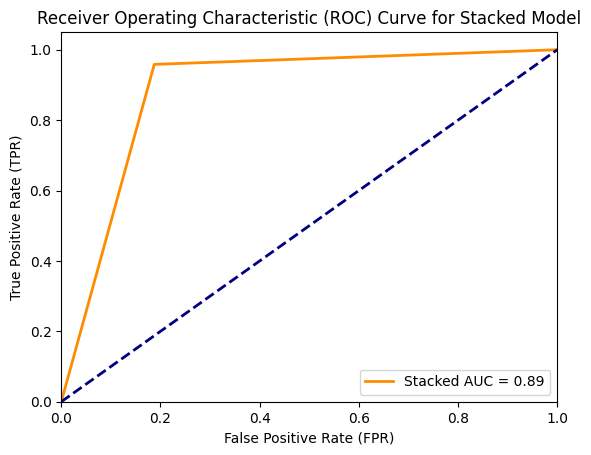

In [12]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create and fit the base RandomForestClassifier model with tuned hyperparameters
base_random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Create and fit the base GradientBoostingClassifier model
base_gradient_boosting = GradientBoostingClassifier(random_state=42)

# Use SelectKBest with ANOVA F-statistic to select the top 5 features
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_top = k_best.fit_transform(X_train, y_train)
X_test_top = k_best.transform(X_test)

# Perform cross-validation on the base models
cv_scores_rf = cross_val_score(base_random_forest, X_train_top, y_train, cv=5, scoring='accuracy')
cv_scores_gb = cross_val_score(base_gradient_boosting, X_train_top, y_train, cv=5, scoring='accuracy')

# Train the base models with the top 5 features
base_random_forest.fit(X_train_top, y_train)
base_gradient_boosting.fit(X_train_top, y_train)

# Make predictions with the base models
y_pred_rf = base_random_forest.predict(X_test_top)
y_pred_gb = base_gradient_boosting.predict(X_test_top)

# Create a Logistic Regression meta-model
meta_model = LogisticRegression(random_state=42)

# Create a StackingClassifier with the base models and meta-model
stacked_model = StackingClassifier(estimators=[
    ('Random Forest', base_random_forest),
    ('Gradient Boosting', base_gradient_boosting)
], final_estimator=meta_model, cv=5)

# Perform cross-validation on the stacked model
cv_scores_stacked = cross_val_score(stacked_model, X_train_top, y_train, cv=5, scoring='accuracy')

# Train the stacked model with the top 5 features
stacked_model.fit(X_train_top, y_train)
y_pred_stacked = stacked_model.predict(X_test_top)

# Rest of the evaluation metrics and plotting...
# Evaluate the base RandomForestClassifier model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Base Random Forest Model Accuracy: {accuracy_rf:.4f}")

# Evaluate the base GradientBoostingClassifier model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Base Gradient Boosting Model Accuracy: {accuracy_gb:.4f}")

# Evaluate the stacked model
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Stacked Model Accuracy: {accuracy_stacked:.4f}")

# Rest of the evaluation metrics and plotting...

# Calculate confusion matrix for stacked model
cm_stacked = confusion_matrix(y_test, y_pred_stacked)

# Display the confusion matrix
print("Stacked Model Confusion Matrix:")
print(cm_stacked)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN_stacked, FP_stacked, FN_stacked, TP_stacked = cm_stacked.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for stacked model
TPR_stacked = TP_stacked / (TP_stacked + FN_stacked)
FPR_stacked = FP_stacked / (FP_stacked + TN_stacked)

print(f"Stacked Model True Positive Rate (TPR): {TPR_stacked:.4f}")
print(f"Stacked Model False Positive Rate (FPR): {FPR_stacked:.4f}")

# Calculate AUC for stacked model
roc_auc_stacked = roc_auc_score(y_test, y_pred_stacked)
print(f"Stacked Model AUC (Area Under the ROC Curve): {roc_auc_stacked:.4f}")

# Calculate Recall (Sensitivity) for stacked model
recall_stacked = recall_score(y_test, y_pred_stacked)
print(f"Stacked Model Recall (Sensitivity): {recall_stacked:.4f}")

# Calculate F1-Score for stacked model
f1_stacked = f1_score(y_test, y_pred_stacked)
print(f"Stacked Model F1-Score: {f1_stacked:.4f}")

# Plot ROC Curve for stacked model
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, y_pred_stacked)
plt.figure()
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label=f'Stacked AUC = {roc_auc_stacked:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Stacked Model')
plt.legend(loc="lower right")
plt.show()


Cross-Validation Scores (Base Model): [0.71875 0.8125  0.90625 0.6875  0.84375]
Mean Accuracy (Base Model): 0.7937
Base Model Accuracy: 0.8250
Cross-Validation Scores (Stacked Model): [0.71875 0.78125 0.90625 0.6875  0.84375]
Mean Accuracy (Stacked Model): 0.7875
Stacked Model Accuracy: 0.8500
Stacked Model Confusion Matrix:
[[13  3]
 [ 3 21]]
Stacked Model True Positive Rate (TPR): 0.8750
Stacked Model False Positive Rate (FPR): 0.1875
Stacked Model AUC (Area Under the ROC Curve): 0.8438
Stacked Model Recall (Sensitivity): 0.8750
Stacked Model F1-Score: 0.8750


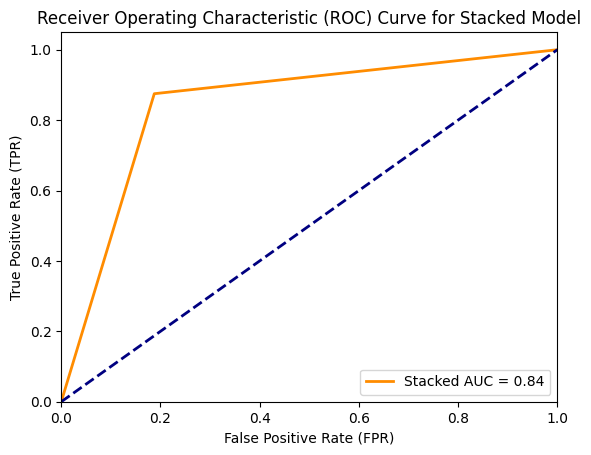

In [21]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Create and fit the base RandomForestClassifier model with tuned hyperparameters
base_random_forest = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)

# Use SelectKBest with ANOVA F-statistic to select the top 5 features
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_top = k_best.fit_transform(X_train, y_train)
X_test_top = k_best.transform(X_test)

# Perform hyperparameter tuning for the RandomForestClassifier
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}
grid_search = GridSearchCV(estimator=base_random_forest, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_top, y_train)
best_random_forest = grid_search.best_estimator_

# Perform cross-validation on the base model
cv_scores = cross_val_score(best_random_forest, X_train_top, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Base Model): {cv_scores}")
print(f"Mean Accuracy (Base Model): {cv_scores.mean():.4f}")

# Train the base model with the top 5 features
best_random_forest.fit(X_train_top, y_train)
y_pred_base = best_random_forest.predict(X_test_top)

# Evaluate the base model
accuracy_base = accuracy_score(y_test, y_pred_base)
print(f"Base Model Accuracy: {accuracy_base:.4f}")

# Create a Logistic Regression meta-model
meta_model = LogisticRegression(random_state=42)

# Create a StackingClassifier with the base model and meta-model
stacked_model = StackingClassifier(estimators=[
    ('Random Forest', best_random_forest)
], final_estimator=meta_model, cv=5)

# Perform cross-validation on the stacked model
cv_scores_stacked = cross_val_score(stacked_model, X_train_top, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores (Stacked Model): {cv_scores_stacked}")
print(f"Mean Accuracy (Stacked Model): {cv_scores_stacked.mean():.4f}")

# Train the stacked model with the top 5 features
stacked_model.fit(X_train_top, y_train)
y_pred_stacked = stacked_model.predict(X_test_top)

# Evaluate the stacked model
accuracy_stacked = accuracy_score(y_test, y_pred_stacked)
print(f"Stacked Model Accuracy: {accuracy_stacked:.4f}")

# Rest of the evaluation metrics and plotting...
#Calculate confusion matrix for stacked model
cm_stacked = confusion_matrix(y_test, y_pred_stacked)

# Display the confusion matrix
print("Stacked Model Confusion Matrix:")
print(cm_stacked)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN_stacked, FP_stacked, FN_stacked, TP_stacked = cm_stacked.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR) for stacked model
TPR_stacked = TP_stacked / (TP_stacked + FN_stacked)
FPR_stacked = FP_stacked / (FP_stacked + TN_stacked)

print(f"Stacked Model True Positive Rate (TPR): {TPR_stacked:.4f}")
print(f"Stacked Model False Positive Rate (FPR): {FPR_stacked:.4f}")

# Calculate AUC for stacked model
roc_auc_stacked = roc_auc_score(y_test, y_pred_stacked)
print(f"Stacked Model AUC (Area Under the ROC Curve): {roc_auc_stacked:.4f}")

# Calculate Recall (Sensitivity) for stacked model
recall_stacked = recall_score(y_test, y_pred_stacked)
print(f"Stacked Model Recall (Sensitivity): {recall_stacked:.4f}")

# Calculate F1-Score for stacked model
f1_stacked = f1_score(y_test, y_pred_stacked)
print(f"Stacked Model F1-Score: {f1_stacked:.4f}")

# Plot ROC Curve for stacked model
fpr_stacked, tpr_stacked, _ = roc_curve(y_test, y_pred_stacked)
plt.figure()
plt.plot(fpr_stacked, tpr_stacked, color='darkorange', lw=2, label=f'Stacked AUC = {roc_auc_stacked:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Stacked Model')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Create and fit the RandomForestClassifier model
random_forest = RandomForestClassifier(random_state=42)

# Use SelectKBest with ANOVA F-statistic to select the top 5 features
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_top = k_best.fit_transform(X_train, y_train)
X_test_top = k_best.transform(X_test)

# Define an extensive hyperparameters grid
param_grid = {
    'n_estimators': [100, 150, 200, 250],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5],
    'max_features': ['auto', 'sqrt', 'log2', 0.2, 0.3, 0.4, None],
    'bootstrap': [True, False]
}


# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_top, y_train)

# Get the best RandomForestClassifier model with tuned hyperparameters
best_random_forest = grid_search.best_estimator_

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_random_forest, X_train_top, y_train, cv=10, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Train the model with the top 5 features and tuned hyperparameters
best_random_forest.fit(X_train_top, y_train)
y_pred = best_random_forest.predict(X_test_top)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Checking Overfitting
print('Training set score: {:.4f}'.format(best_random_forest.score(X_train_top, y_train)))
print('Test set score: {:.4f}'.format(best_random_forest.score(X_test_top, y_test)))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.7750
Training set score: 0.8688
Test set score: 0.7750
Confusion Matrix:
[[12  4]
 [ 5 19]]
True Positive Rate (TPR): 0.7917
False Positive Rate (FPR): 0.2500
AUC (Area Under the ROC Curve): 0.7708
Recall (Sensitivity): 0.7917
F1-Score: 0.8085


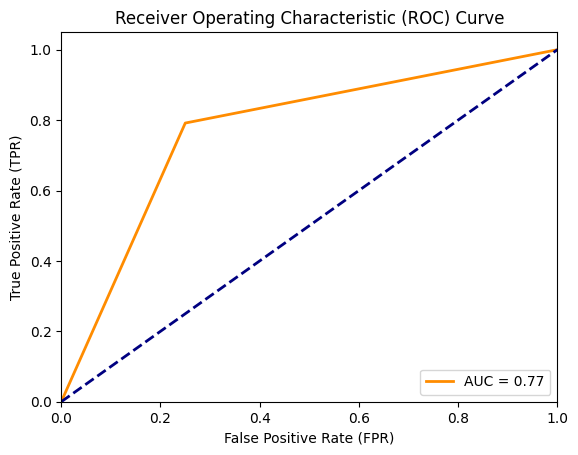

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

#Create and fit the RandomForestClassifier model
random_forest = RandomForestClassifier(random_state=42)

# Use SelectKBest with ANOVA F-statistic to select the top 5 features
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_top = k_best.fit_transform(X_train, y_train)
X_test_top = k_best.transform(X_test)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_top, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Get the best RandomForestClassifier model with tuned hyperparameters
best_random_forest = grid_search.best_estimator_

# Train the model with the top 5 features and tuned hyperparameters
best_random_forest.fit(X_train_top, y_train)
y_pred = best_random_forest.predict(X_test_top)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Checking Overfitting
print('Training set score: {:.4f}'.format(best_random_forest.score(X_train_top, y_train)))
print('Test set score: {:.4f}'.format(best_random_forest.score(X_test_top, y_test)))

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Define hyperparameter grids for all models
model_params = {
    'GradientBoosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 5, 7],
            # Add other GB hyperparameters to tune
        }
    },
    'SVM': {
        'model': SVC(probability=True, random_state=42),
        'params': {
            'C': [0.1, 1.0, 10.0],
            'kernel': ['linear', 'rbf'],
            # Add other SVM hyperparameters to tune
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(random_state=42),
        'params': {
            'max_depth': [3, 5, 7],
            'min_samples_split': [2, 5, 10],
            # Add other Decision Tree hyperparameters to tune
        }
    }
}

# Use GridSearchCV for hyperparameter tuning for all models
best_models = {}
for model_name, model_info in model_params.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_

# Make predictions on the test set using individual models
y_preds = {}
for model_name, best_model in best_models.items():
    y_preds[model_name] = best_model.predict(X_test)

# Create a new feature matrix using the predictions
X_ensemble = np.column_stack([y_preds[model_name] for model_name in best_models])

# Define hyperparameters for the ensemble Random Forest
rf_params = {
    'n_estimators': [100, 200, 300, 400],  # Adjust the number of estimators
    'max_depth': [5, 10, 15, 20],  # Adjust the maximum depth of trees
    'min_samples_split': [2, 5, 10],  # Adjust the minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Adjust the minimum number of samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Adjust the number of features to consider for the best split
    'bootstrap': [True, False],  # Adjust whether bootstrapping is used in building trees
    # Add other Random Forest hyperparameters to tune
}

# Use GridSearchCV for hyperparameter tuning of the ensemble model
rf_grid_search = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_ensemble, y_test)

# Get the best ensemble model with tuned hyperparameters
best_rf_ensemble = rf_grid_search.best_estimator_

# Make predictions using the ensemble model
y_pred_ensemble = best_rf_ensemble.predict(X_ensemble)

# Evaluate the ensemble model
accuracy = accuracy_score(y_test, y_pred_ensemble)
print(f"Ensemble Accuracy: {accuracy:.4f}")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred_ensemble)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred_ensemble)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred_ensemble)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_ensemble)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


KeyboardInterrupt: ignored

Accuracy (SVM): 0.7250
Confusion Matrix (SVM):
[[11  5]
 [ 6 18]]
True Positive Rate (TPR - SVM): 0.7500
False Positive Rate (FPR - SVM): 0.3125
AUC (Area Under the ROC Curve - SVM): 0.7188
Recall (Sensitivity - SVM): 0.7500
F1-Score (SVM): 0.7660


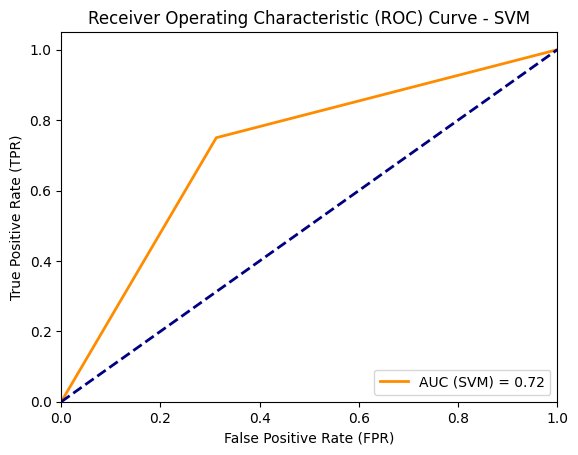

In [ ]:
# Create an SVM classifier and fit it to the training data
svm_classifier = SVC(kernel='linear', C=1.0, probability=True).fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy (SVM): {accuracy_svm:.4f}")

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(cm_svm)

# Extract TP, TN, FP, FN
TN_svm, FP_svm, FN_svm, TP_svm = cm_svm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR_svm = TP_svm / (TP_svm + FN_svm)
FPR_svm = FP_svm / (FP_svm + TN_svm)

print(f"True Positive Rate (TPR - SVM): {TPR_svm:.4f}")
print(f"False Positive Rate (FPR - SVM): {FPR_svm:.4f}")

# Calculate AUC (Area Under the ROC Curve)
roc_auc_svm = roc_auc_score(y_test, y_pred_svm)
print(f"AUC (Area Under the ROC Curve - SVM): {roc_auc_svm:.4f}")

# Calculate Recall (Sensitivity)
recall_svm = recall_score(y_test, y_pred_svm)
print(f"Recall (Sensitivity - SVM): {recall_svm:.4f}")

# Calculate F1-Score
f1_svm = f1_score(y_test, y_pred_svm)
print(f"F1-Score (SVM): {f1_svm:.4f}")

# Plot ROC Curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm)
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'AUC (SVM) = {roc_auc_svm:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.6
Confusion Matrix:
[[11  5]
 [11 13]]
True Positive Rate (TPR): 0.5417
False Positive Rate (FPR): 0.3125
AUC (Area Under the ROC Curve): 0.6146
Recall (Sensitivity): 0.5417
F1-Score: 0.6190


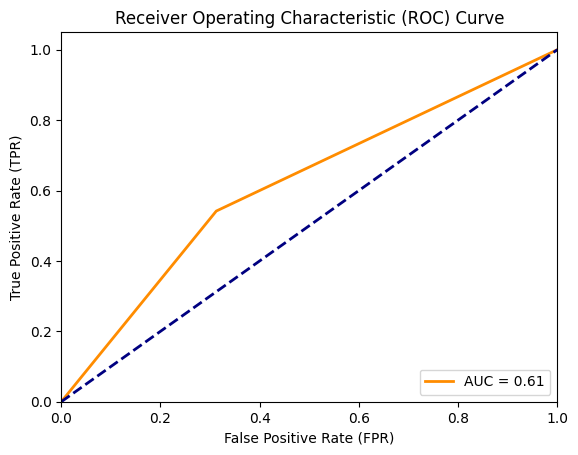

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)
y_p_knn = knn.predict(X_test)
accuracy_score(y_test, y_p_knn)

# Evaluate the model
accuracy = accuracy_score(y_test, y_p_knn)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_p_knn)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)
# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_p_knn)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_p_knn)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_p_knn)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_p_knn)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Accuracy: 0.8500
Confusion Matrix:
[[14  2]
 [ 4 20]]
True Positive Rate (TPR): 0.8333
False Positive Rate (FPR): 0.1250
AUC (Area Under the ROC Curve): 0.8542
Recall (Sensitivity): 0.8333
F1-Score: 0.8696


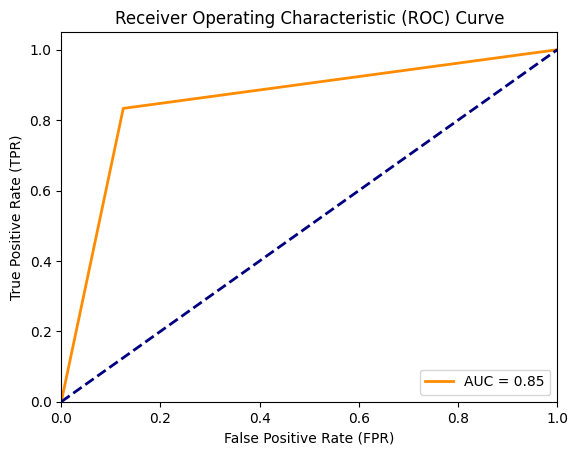

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
import matplotlib.pyplot as plt

# Create a Decision Tree classifier with optimized hyperparameters
clf = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Train the Decision Tree classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.7750
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        16
           1       0.86      0.75      0.80        24

    accuracy                           0.78        40
   macro avg       0.77      0.78      0.77        40
weighted avg       0.79      0.78      0.78        40

Confusion Matrix:
[[13  3]
 [ 6 18]]
True Positive Rate (TPR): 0.7500
False Positive Rate (FPR): 0.1875
AUC (Area Under the ROC Curve): 0.7812
Recall (Sensitivity): 0.7500
F1-Score: 0.8000


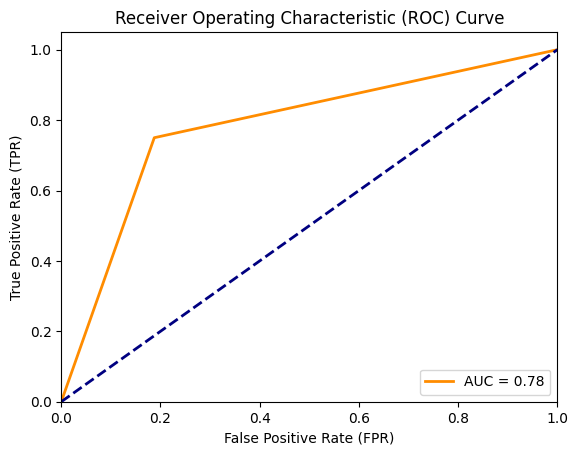

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Create a Gradient Boosting classifier
clf = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report for more detailed evaluation
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

<ipython-input-20-2969596fb815>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_')


[LightGBM] [Info] Number of positive: 76, number of negative: 84
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1705
[LightGBM] [Info] Number of data points in the train set: 160, number of used features: 78
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.475000 -> initscore=-0.100083
[LightGBM] [Info] Start training from score -0.100083
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

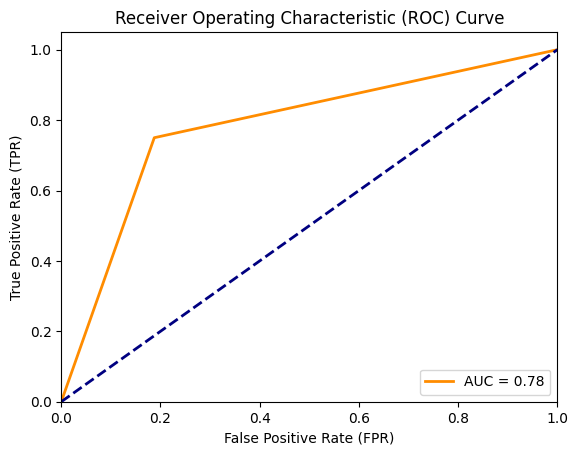

In [ ]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Replace special characters and spaces with underscores
X_train.columns = X_train.columns.str.replace('[^a-zA-Z0-9_]', '_')

# build the lightgbm model
import lightgbm as lgb
#clf = lgb.LGBMClassifier()

clf.fit(X_train, y_train)

# predict the results
y_pred=clf.predict(X_test)

y_pred_binary = [1 if p >= 0.5 else 0 for p in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
print(f"Accuracy: {accuracy}")

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred_binary)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred_binary)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_binary)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#Best Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, recall_score, f1_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt

# Create and fit the RandomForestClassifier model
random_forest = RandomForestClassifier(random_state=42)

# Use SelectKBest with ANOVA F-statistic to select the top 5 features
k_best = SelectKBest(score_func=f_classif, k=5)
X_train_top = k_best.fit_transform(X_train, y_train)
X_test_top = k_best.transform(X_test)

# Perform cross-validation
cv_scores = cross_val_score(random_forest, X_train_top, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Accuracy: {cv_scores.mean():.4f}")

# Train the model with the top 5 features
random_forest.fit(X_train_top, y_train)
y_pred = random_forest.predict(X_test_top)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Checking Overfitting
print('Training set score: {:.4f}'.format(random_forest.score(X_train_top, y_train)))
print('Test set score: {:.4f}'.format(random_forest.score(X_test_top, y_test)))

cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(cm)

# Extract true negatives (TN), false positives (FP), true positives (TP), and false negatives (FN)
TN, FP, FN, TP = cm.ravel()

# Calculate True Positive Rate (TPR) and False Positive Rate (FPR)
TPR = TP / (TP + FN)
FPR = FP / (FP + TN)

print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")

# Calculate AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"AUC (Area Under the ROC Curve): {roc_auc:.4f}")

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, y_pred)
print(f"Recall (Sensitivity): {recall:.4f}")

# Calculate F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()